In [ ]:
#1) steps for the project(life cycle
# DATA WRANGLING,data cleaning,data transformation,train test the data

In [ ]:
#  Step2
# feauture transformation  (not let the model baised to any feature)
# feature selection( to check the data is it effecting or not) by checking p value ,coefficient we can check data effectiveornot

In [ ]:
# step3
# moduling of evalution (we can check through pair plot)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as snb
import warnings as wn
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.formula.api import ols

In [2]:
# step 1:-

In [3]:
df=pd.read_csv("diabetes.csv",index_col="Unnamed: 0")# extracting data and removing un named column

In [4]:
df

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6,Glucose
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [5]:
df.isnull() # to check null values

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6,Glucose
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   gender   442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  Glucose  442 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


In [7]:
df.describe()

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6,Glucose
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.629575e-16,1.309912e-16,-8.015207e-16,1.322472e-16,-8.665768e-17,1.321216e-16,-4.558947e-16,3.923458e-16,-3.853127e-16,-3.385929e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


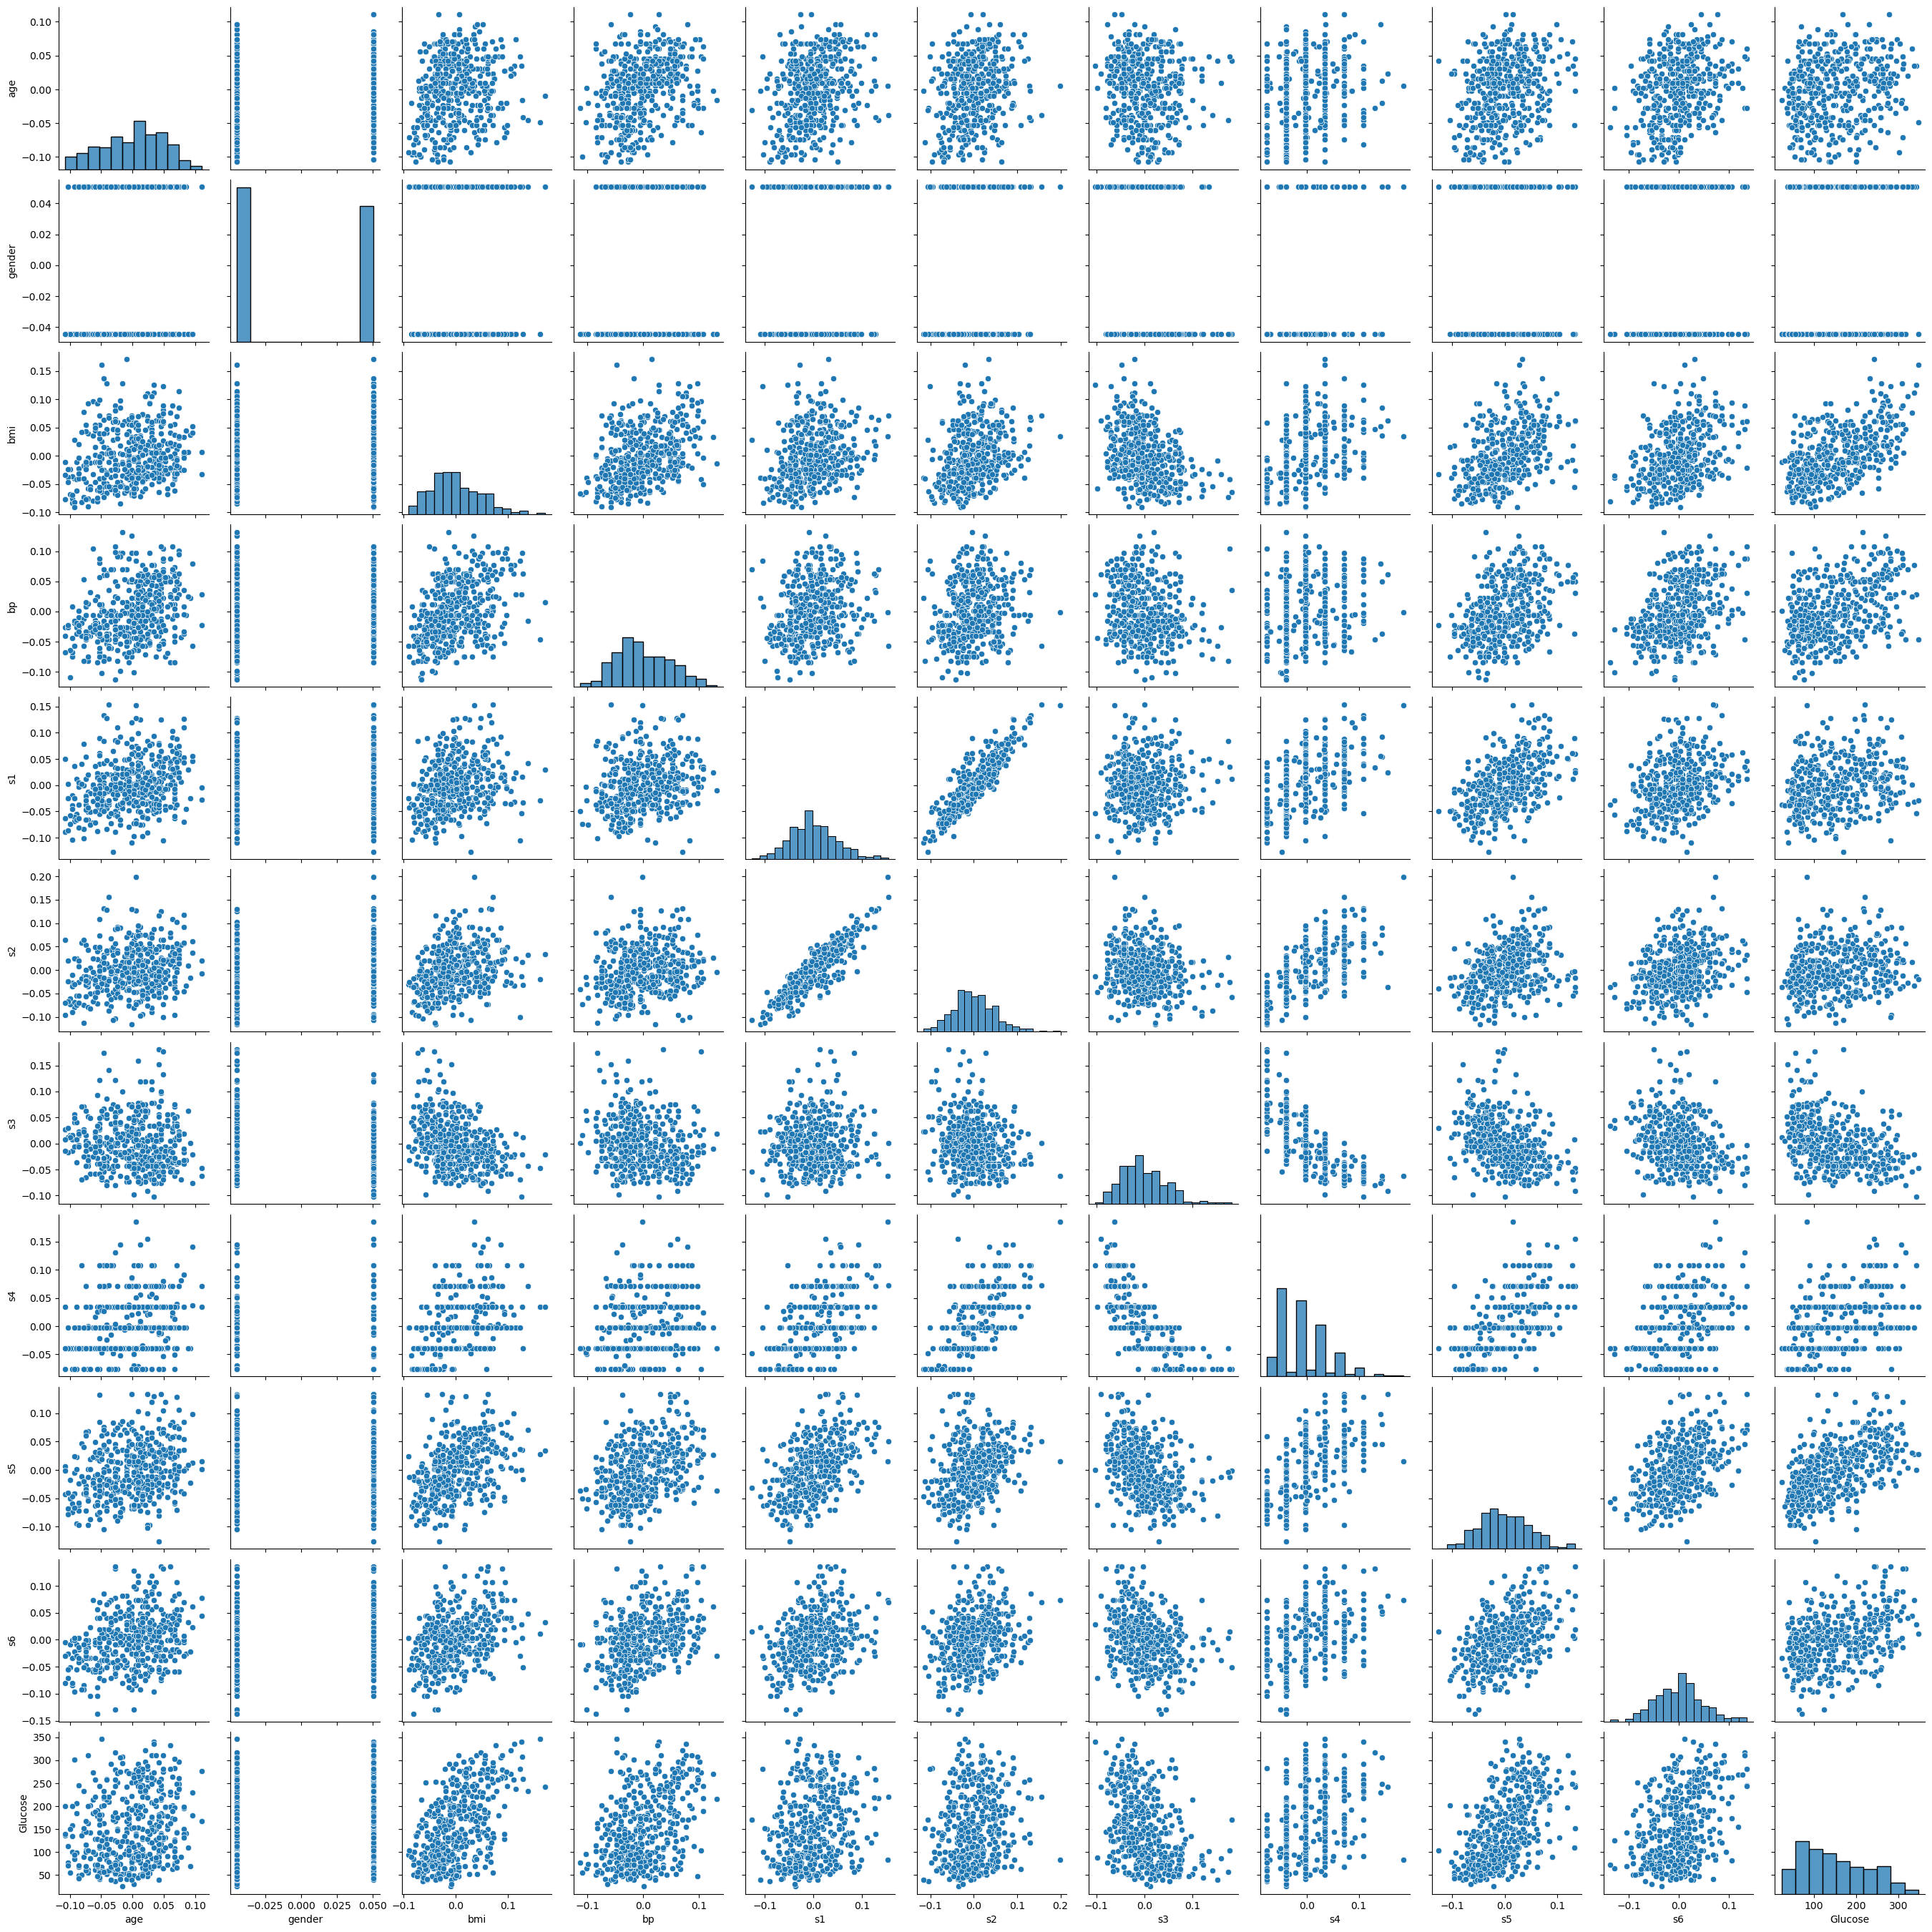

In [7]:
snb.pairplot(df) # pairplot allows us to plot pair wise relationship between variable within a datasets

<Axes: >

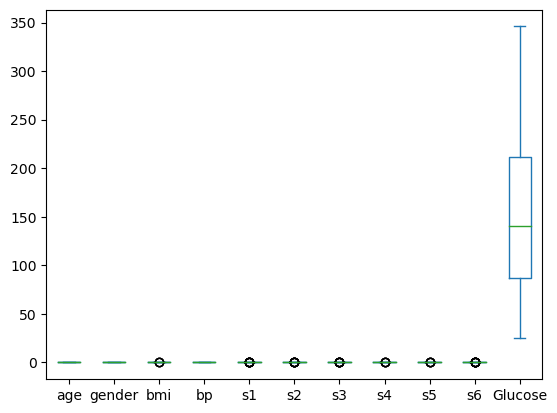

In [8]:
df.plot.box() # to know the outlayer we can check through box plot

In [ ]:
# to find out the outlayers

In [ ]:
# outliers are those data points that are significantly different from the rest of the dataset

In [9]:
# eiqr=1.5*(q3-q1)
# q3=upper bound
# q1=Lower bound

In [9]:
df.drop("Glucose",axis=1,inplace=True)

In [10]:
q3=np.quantile(df["age"],0.75) # an array and a number say quantile  between 0 and 1

In [11]:
q1=np.quantile(df["age"],0.25)

In [12]:
q1,q3

(-0.0372992664252317, 0.0380759064334241)

In [14]:
# if it is more than 1.5 above the third quantile or below the first quantile
# said differently,low outliers are below Q1 - 1.5 and high outliers are above Q3 + 1.5

In [13]:
eiqr=1.5*q3-q1

In [14]:
eiqr

0.09441312607536786

In [15]:
ub=q3+eiqr # upper bound

In [16]:
lb=q1-eiqr # lower bound

In [17]:
ub,lb

(0.13248903250879196, -0.13171239250059957)

In [20]:
# df.loc[(df["s4"]<lb)|(df["s4"]>ub),"s4"] # this helps us to know at which columns or rows we have out layers

In [21]:
df1=df.loc[(df["s2"]<lb)|(df["s2"]>ub),:]=df["s2"].median() # (> greater,< lesser)

In [22]:
df1

-0.0038190651205348

In [23]:
# how to impliment in loop

In [24]:
for k in df.columns[:-1]:
    q1=np.quantile(df[k],0.25)
    q3=np.quantile(df[k],0.75)
    eigr=1.5*(q3-q1)
    lb=q1-eigr
    ub=q3+eigr
    df.loc[(df[k]<lb)|(df[k]>ub),k]=df[k].median()

<Axes: >

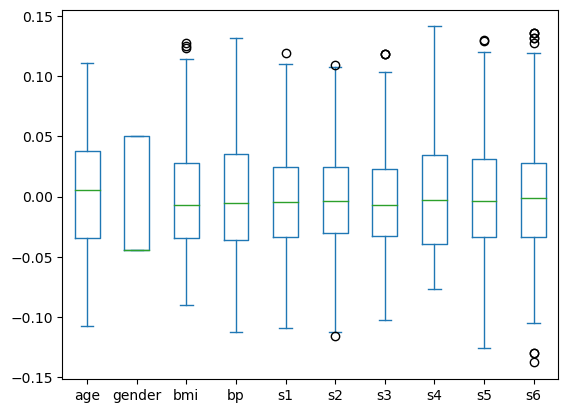

In [25]:
df.plot.box()

In [26]:
for k in df.columns[:-1]:
    print(df[k].skew())  # skewness tells us about the directions of outliers

-0.2343248591207158
0.1384819676023775
0.45908906906805214
0.2888017681080034
0.16215701194470647
0.06604861406278884
0.374399865674539
0.5657177910022019
0.1926764772164647


In [27]:
for k in df.columns[:-1]:
    print(df[k].kurtosis()) # kurtosis identifiers whether the tails of a given distribution contain extreme values

-0.6641754657116299
-1.9853962828162228
-0.325395162681819
-0.5241728928442679
-0.2453814311343061
-0.24729120565518636
-0.2891559081816313
-0.09957787606989132
-0.2938407534544174


In [28]:
# step 2
# feauture transformation (not let the model baised to any  feature)
# scaleing transformation (feature scaling)
# feature selection (to check the data is it effecting or not)

In [29]:
# breaking the plot is binomial datasets
# [log]()
# sqrt()
# box.cox()data transformation

In [30]:
from sklearn.preprocessing import PowerTransformer
#  PowerTransformer is used to make the data distribution more-Gaussian and standardize the result

In [31]:
pt=PowerTransformer()

In [32]:
pt1=pt.fit_transform(df)

In [33]:
dx=pd.DataFrame(pt1,columns=df.columns)

In [34]:
dx

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.786726,1.072975,1.349948,0.512854,-0.966119,-0.735460,-0.970600,0.095407,0.496734,-0.337955
1,-0.095950,-0.936237,-1.161104,-0.518576,-0.113326,-0.367254,1.704887,-0.844985,-1.513939,-2.046964
2,1.938726,1.072975,1.043281,-0.059830,-0.999778,-0.720668,-0.668192,0.095407,0.130781,-0.519169
3,-1.760953,-0.936237,-0.129662,-0.757717,0.359298,0.653058,-0.767665,0.869162,0.555524,-0.158883
4,0.058476,-0.936237,-0.749539,0.512854,0.171928,0.438185,0.342133,0.095407,-0.650673,-0.981631
...,...,...,...,...,...,...,...,...,...,...
437,0.871075,1.072975,0.560255,1.234054,-0.049497,0.019389,-0.570033,0.095407,0.733417,0.192871
438,-0.172175,1.072975,-0.232643,-1.515618,1.175958,1.869892,-0.570033,0.869162,-0.334233,0.954294
439,0.871075,1.072975,-0.232643,0.420371,-0.798786,-0.242826,-0.473173,-0.105017,-0.998299,0.365599
440,-0.969503,-0.936237,0.942678,0.087422,0.452158,0.431003,-0.570033,0.718871,1.007569,-0.519169


<Axes: ylabel='Density'>

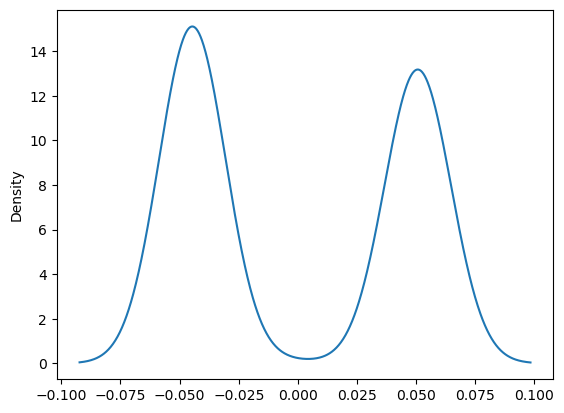

In [35]:
df["gender"].plot.density()

<Axes: ylabel='Density'>

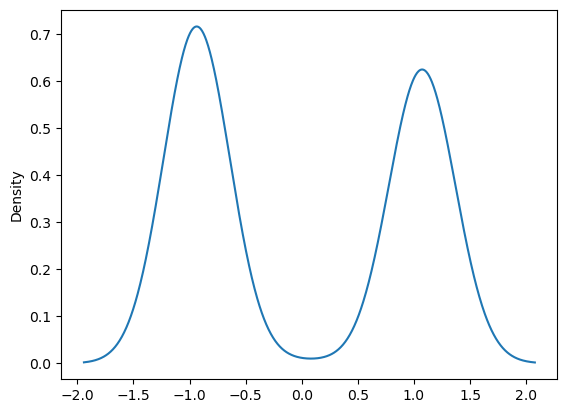

In [36]:
dx["gender"].plot.density()

<Axes: ylabel='Density'>

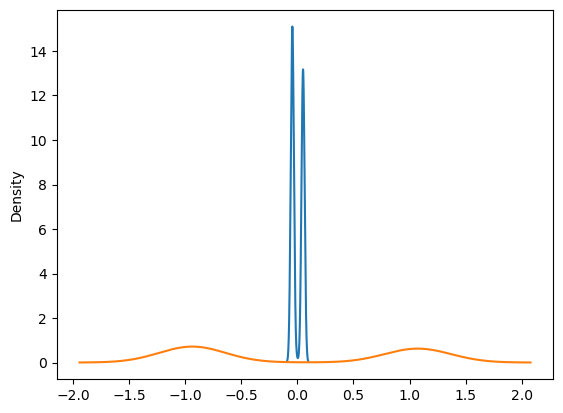

In [37]:
df["gender"].plot.density()
dx["gender"].plot.density()

In [38]:
for k in dx.columns[:-1]:
    print(dx[k].skew())

-0.02304515452834312
0.13707560306376915
0.040000954767284054
0.021847801426327855
0.004815320529436958
0.0008105229915873797
0.023490117089141165
0.04256129124559713
0.008272719404030295


In [39]:
for k in dx.columns[:-1]:
    print(dx[k].kurtosis())

-0.6794506040857029
-1.9856111949058157
-0.6075433368627587
-0.5543808179764906
-0.26963624622798266
-0.24134645944452426
-0.45994472250514384
-0.5310916848085037
-0.3459825776112959


In [40]:
for k,m in zip(df.columns,dx.columns):
    print(df[k].skew(),(df[m].skew()))
    

-0.2343248591207158 -0.2343248591207158
0.1384819676023775 0.1384819676023775
0.45908906906805214 0.45908906906805214
0.2888017681080034 0.2888017681080034
0.16215701194470647 0.16215701194470647
0.06604861406278884 0.06604861406278884
0.374399865674539 0.374399865674539
0.5657177910022019 0.5657177910022019
0.1926764772164647 0.1926764772164647
0.21715845038161347 0.21715845038161347


In [41]:
for k,m in zip(df.columns,dx.columns):
    print(df[k].kurtosis(),(df[m].kurtosis()))

-0.6641754657116299 -0.6641754657116299
-1.9853962828162228 -1.9853962828162228
-0.325395162681819 -0.325395162681819
-0.5241728928442679 -0.5241728928442679
-0.2453814311343061 -0.2453814311343061
-0.24729120565518636 -0.24729120565518636
-0.2891559081816313 -0.2891559081816313
-0.09957787606989132 -0.09957787606989132
-0.2938407534544174 -0.2938407534544174
0.28672819024304275 0.28672819024304275


In [42]:
# (Scaling Transformation) helps us to transform it from negative to positive

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
m=MinMaxScaler(feature_range=(10,20)) # a method use to normalize the range of independent variables or features of data

In [45]:
tv=m.fit_transform(df)

In [46]:
d1=pd.DataFrame(tv,columns=df.columns)

In [47]:
d1 # helps to show positive value

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6
0,16.666667,20.0,16.980198,15.492958,12.831325,13.598326,12.666667,13.389831,15.699389,14.393939
1,14.833333,10.0,11.782178,13.521127,14.397590,14.295676,18.000000,11.694915,12.254981,11.666667
2,18.833333,20.0,16.188119,14.366197,12.771084,13.626220,13.166667,13.389831,15.034045,14.090909
3,10.833333,10.0,13.613861,13.098592,15.301205,16.262204,13.000000,15.084746,15.808048,14.696970
4,15.166667,10.0,12.475248,15.492958,14.939759,15.843794,15.000000,13.389831,13.673459,13.333333
...,...,...,...,...,...,...,...,...,...,...
437,16.833333,20.0,15.049505,17.042254,14.518072,15.034868,13.333333,13.389831,16.139886,15.303030
438,14.666667,20.0,13.415842,11.830986,16.927711,18.675035,13.333333,15.084746,14.215004,16.666667
439,16.833333,20.0,13.415842,15.305164,13.132530,14.532775,13.500000,13.000000,13.092299,15.606061
440,12.833333,10.0,15.940594,14.647887,15.481928,15.829847,13.333333,14.728814,16.660438,14.090909


In [48]:
df

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [49]:
dt=np.log(d1) # log help us to smoothen the skew and kurtosis

In [50]:
dt

,age,gender,bmi,bp,s1,s2,s3,s4,s5,s6
0,2.813411,2.995732,2.832048,2.740386,2.551889,2.609947,2.538974,2.594496,2.753622,2.666807
1,2.696877,2.302585,2.466588,2.604253,2.667061,2.659957,2.890372,2.459154,2.505932,2.456736
2,2.935628,2.995732,2.784278,2.664878,2.547184,2.611996,2.577688,2.594496,2.710317,2.645530
3,2.382628,2.302585,2.611088,2.572505,2.727932,2.788844,2.564949,2.713684,2.760519,2.687641
4,2.719100,2.302585,2.523746,2.740386,2.704026,2.762778,2.708050,2.594496,2.615457,2.590267
...,...,...,...,...,...,...,...,...,...,...
437,2.823361,2.995732,2.711345,2.835696,2.675394,2.710372,2.590267,2.594496,2.781294,2.728051
438,2.685577,2.995732,2.596436,2.470722,2.828952,2.927188,2.590267,2.713684,2.654298,2.813411
439,2.823361,2.995732,2.596436,2.728190,2.575092,2.676406,2.602690,2.564949,2.572024,2.747659
440,2.552046,2.302585,2.768869,2.684296,2.739673,2.761897,2.590267,2.689806,2.813037,2.645530


In [51]:
# return the element-wise natural logarithm of values in x

In [52]:
for k,n in zip(df.columns,dt.columns):
    print(df[k].skew(),df[n].skew())

-0.2343248591207158 -0.2343248591207158
0.1384819676023775 0.1384819676023775
0.45908906906805214 0.45908906906805214
0.2888017681080034 0.2888017681080034
0.16215701194470647 0.16215701194470647
0.06604861406278884 0.06604861406278884
0.374399865674539 0.374399865674539
0.5657177910022019 0.5657177910022019
0.1926764772164647 0.1926764772164647
0.21715845038161347 0.21715845038161347


In [53]:
for k,n in zip(df.columns,dt.columns):
    print(df[k].kurtosis(),df[n].kurtosis())

-0.6641754657116299 -0.6641754657116299
-1.9853962828162228 -1.9853962828162228
-0.325395162681819 -0.325395162681819
-0.5241728928442679 -0.5241728928442679
-0.2453814311343061 -0.2453814311343061
-0.24729120565518636 -0.24729120565518636
-0.2891559081816313 -0.2891559081816313
-0.09957787606989132 -0.09957787606989132
-0.2938407534544174 -0.2938407534544174
0.28672819024304275 0.28672819024304275


In [54]:
# if it is categorical data then we use ONE HOT ENCODER,to transfer the data

In [55]:
# In decision tree we dont have coefficient value

In [56]:
# co efficient is a weights

In [18]:
df=pd.read_csv("diabetes.csv",index_col="Unnamed: 0")

In [19]:
x=df[["age","gender","bmi","bp","s1","s2","s3","s4","s5","s6"]]

In [20]:
y=df["Glucose"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
# linear model(algorithm)

In [ ]:
# LINEAR MODEL:-

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
mdl=LinearRegression()

In [64]:
mdl.fit(xtrain,ytrain)

LinearRegression()

In [65]:
yptrain=mdl.predict(xtrain)

In [66]:
yptest=mdl.predict(xtest)

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [68]:
mean_squared_error(yptrain,ytrain)

2740.932777840707

In [69]:
mean_squared_error(yptest,ytest)

3350.1093764206253

In [70]:
mean_absolute_error(yptrain,ytrain)

42.09356220719303

In [71]:
mean_absolute_error(yptrain,ytrain)

42.09356220719303

In [72]:
from statsmodels.formula.api import ols

In [73]:
lmd=ols("y~x",data=df).fit()

In [74]:
lmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:15   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# RIDGE REGRESSION MODEL:-
                 # ridge regression is a technique used to eliminate multicollinearity in data models.

In [76]:
from sklearn.linear_model import Ridge

In [77]:
rd=Ridge()

In [78]:
rd.fit(xtrain,ytrain)

Ridge()

In [79]:
YPtrain=rd.predict(xtrain)

In [80]:
YPtest=rd.predict(xtest)

In [81]:
mean_absolute_error(YPtrain,ytrain)

48.25060680283148

In [82]:
mean_absolute_error(YPtest,ytest)

50.28581147866744

In [83]:
rmd=ols("y~x",data=df).fit()

In [84]:
rmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:18   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# KNN REGRESSOR

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
kn=KNeighborsRegressor(n_neighbors=10)

In [88]:
kn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [89]:
Yptrain=kn.predict(xtrain)

In [90]:
Yptest=kn.predict(xtest)

In [91]:
mean_squared_error(Yptrain,ytrain)

2843.758247734139

In [92]:
mean_squared_error(Yptest,ytest)

3391.437657657657

In [93]:
mean_absolute_error(Yptrain,ytrain)

42.60725075528701

In [94]:
mean_absolute_error(Yptest,ytest)

46.00000000000001

In [95]:
kmd=ols("y~x",data=df).fit()

In [96]:
kmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:22   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# DEcision tree

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
dt=DecisionTreeRegressor(criterion="squared_error",max_depth=1)

In [100]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1)

In [101]:
yp_train=dt.predict(xtrain)

In [102]:
yp_test=dt.predict(xtest)

In [103]:
mean_squared_error(yp_train,ytrain)

3996.721884590675

In [104]:
mean_squared_error(yp_test,ytest)

5191.851675733581

In [105]:
mean_absolute_error(yp_train,ytrain)

52.56491060610405

In [106]:
mean_absolute_error(yp_test,ytest)

60.84830218091649

In [107]:
dmd=ols("y~age+gender+bmi+bp+s1+s2+s3+s4+s5+s6",data=df).fit()

In [108]:
df.columns

Index(['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Glucose'],
      dtype='object')

In [109]:
dmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:26   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0122     59.749     -0.168      0.867    -127.448     107.424
gender      -239.8191     61.222     -3.917      0.000    -360.151    -119.488
bmi          519.8398     66.534      7.813      0.000     389.069     650.610
bp           324.3904     65.422      4.958      0.000     195.805     452.976
s1          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
s2           476.7458    339.035      1.406      0.160    -189.621    1143.113
s3           101.0446    212.533      0.475      0.635    -316.685     518.774
s4           177.0642    161.476      1.097      0.273    -140.313     494.442
s5           751.2793    171.902      4.370      0.000     413.409    1089.150
s6            67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Random forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [112]:
RF=RandomForestRegressor(criterion="squared_error",max_depth=1)

In [113]:
RF.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=1)

In [114]:
ypTrain=RF.predict(xtrain)

In [115]:
ypTest=RF.predict(xtest)

In [116]:
mean_absolute_error(ypTrain,ytrain)

49.89038033935746

In [117]:
mean_absolute_error(ypTest,ytest)

55.98682523228327

In [118]:
mean_squared_error(ypTrain,ytrain)

3467.4851396651884

In [119]:
mean_squared_error(ypTest,ytest)

4311.668464960779

In [120]:
rmd=ols("y~x",data=df).fit()

In [121]:
rmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:31   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
np.linalg.cond(x,p=2)

21.68154463827323

In [ ]:
# gradient boosting algorithm

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
gd=GradientBoostingRegressor(max_depth=1)

In [126]:
gd.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=1)

In [127]:
ypTRain=gd.predict(xtrain)

In [128]:
ypTEst=gd.predict(xtest)

In [129]:
mean_squared_error(ypTRain,ytrain)

2307.8062964613437

In [130]:
mean_squared_error(ypTEst,ytest)

3423.571091977239

In [131]:
mean_absolute_error(ypTRain,ytrain)

39.374567620186305

In [132]:
mean_absolute_error(ypTEst,ytest)

48.56727788643755

In [133]:
gmd=ols("y~x",data=df).fit()

In [134]:
gmd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:34   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
# xgboosting algorithm

In [136]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
import xgboost as xgb

In [138]:
xg=xgb.XGBRegressor()

In [139]:
xg.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
YPTRAIN=xg.predict(xtrain)

In [141]:
YPTEST=xg.predict(xtest)

In [142]:
mean_squared_error(YPTRAIN,ytrain)

0.01501742657705949

In [143]:
mean_squared_error(YPTEST,ytest)

4428.973937681042

In [144]:
mean_absolute_error(YPTRAIN,ytrain)

0.08053710453459864

In [145]:
mean_absolute_error(YPTEST,ytest)

54.14412706392305

In [146]:
xgmdl=ols("y~x",data=df).fit()

In [147]:
xgmdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:15:47   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
st=StandardScaler()

In [150]:
st.fit(xtrain,ytrain)

StandardScaler()

In [151]:
xtr=st.transform(xtrain)

In [152]:
xts=st.transform(xtest)

In [153]:
# lasso helps us to reduce the features

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lomdl=Lasso()

In [25]:
lomdl.fit(xtrain,ytrain)

Lasso()

In [26]:
loyptrain=lomdl.predict(xtrain)

In [27]:
loyptest=lomdl.predict(xtest)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [29]:
mean_squared_error(ytrain,loyptrain)

3687.0960013472063

In [30]:
mean_squared_error(ytest,loyptest)

3469.514329426131

In [31]:
mean_absolute_error(ytrain,loyptrain)

51.149118933533636

In [32]:
mean_absolute_error(ytest,loyptest)

51.17750595151947

In [33]:
mean_absolute_percentage_error(ytrain,loyptrain)

0.48027791550074506

In [34]:
mean_absolute_percentage_error(ytest,loyptest)

0.4750165321178215

In [35]:
lsmdl=ols("y~x",data=df).fit()

In [36]:
lsmdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.83e-62
Time:                        12:52:48   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
x[0]         -10.0122     59.749     -0.168      0.867    -127.448     107.424
x[1]        -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x[2]         519.8398     66.534      7.813      0.000     389.069     650.610
x[3]         324.3904     65.422      4.958      0.000     195.805     452.976
x[4]        -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x[5]         476.7458    339.035      1.406      0.160    -189.621    1143.113
x[6]         101.0446    212.533      0.475      0.635    -316.685     518.774
x[7]         177.0642    161.476      1.097      0.273    -140.313     494.442
x[8]         751.2793    171.902      4.370      0.000     413.409    1089.150
x[9]          67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# pca helps us to reduce multicollinearity

In [38]:
from sklearn.decomposition import PCA

In [39]:
PC=PCA(n_components=8)

In [40]:
PC.fit(x)

PCA(n_components=8)

In [41]:
PC.explained_variance_ratio_ *100  # exaplained variance ratio is telling us which column is contributing less

array([40.24214176, 14.92318235, 12.05962312,  9.55476388,  6.62185579,
        6.02719211,  5.36560457,  4.33683203])

In [42]:
pc=PC.transform(x)

In [43]:
d=pd.DataFrame(pc)

In [44]:
d

,0,1,2,3,4,5,6,7
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,-0.048099,-0.008553,0.036028
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.048184,0.010674,-0.008962
2,0.012945,-0.077764,0.035164,-0.037647,-0.055357,-0.052931,-0.021994,0.040109
3,0.002345,0.018182,-0.095750,0.065318,0.012154,0.021181,0.022933,-0.017496
4,-0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.038746,0.020760,-0.050409
...,...,...,...,...,...,...,...,...
437,0.058958,-0.049275,0.044173,-0.031215,0.009718,-0.022801,0.018761,0.006016
438,0.060155,0.036211,-0.083249,-0.053914,-0.004472,0.046301,-0.055821,0.008583
439,-0.009763,-0.057337,0.023596,-0.064372,-0.006739,-0.002154,-0.030225,-0.023387
440,0.032956,0.009994,-0.041321,0.076903,0.005691,-0.026489,0.025956,0.003742


In [45]:
d["y"]=y

In [46]:
X=d.iloc[:,:-1]

In [47]:
np.linalg.cond(X,p=2) # direct way to see condition number 
                      # NOTE:we should find condition number after transforming everthing

3.0461707428816656

In [48]:
pcm=ols("y~X",data=d).fit()

In [49]:
d

,0,1,2,3,4,5,6,7,y
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,-0.048099,-0.008553,0.036028,151.0
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.048184,0.010674,-0.008962,75.0
2,0.012945,-0.077764,0.035164,-0.037647,-0.055357,-0.052931,-0.021994,0.040109,141.0
3,0.002345,0.018182,-0.095750,0.065318,0.012154,0.021181,0.022933,-0.017496,206.0
4,-0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.038746,0.020760,-0.050409,135.0
...,...,...,...,...,...,...,...,...,...
437,0.058958,-0.049275,0.044173,-0.031215,0.009718,-0.022801,0.018761,0.006016,178.0
438,0.060155,0.036211,-0.083249,-0.053914,-0.004472,0.046301,-0.055821,0.008583,104.0
439,-0.009763,-0.057337,0.023596,-0.064372,-0.006739,-0.002154,-0.030225,-0.023387,132.0
440,0.032956,0.009994,-0.041321,0.076903,0.005691,-0.026489,0.025956,0.003742,220.0


In [50]:
pcm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     57.21
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           3.67e-63
Time:                        12:52:50   Log-Likelihood:                -2387.8
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     433   BIC:                             4830.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.580     58.960      0.000     147.062     157.205
X[0]         448.1949     27.042     16.574      0.000     395.045     501.344
X[1]        -256.7475     44.406     -5.782      0.000    -344.026    -169.469
X[2]         238.2454     49.398      4.823      0.000     141.156     335.335
X[3]         593.1033     55.496     10.687      0.000     484.027     702.179
X[4]         -16.6711     66.663     -0.250      0.803    -147.695     114.352
X[5]        -180.1552     69.874     -2.578      0.010    -317.490     -42.820
X[6]         156.8344     74.057      2.118      0.035      11.279     302.390
X[7]          76.6936     82.374      0.931      0.352     -85.209     238.596
==============================================================================
Omnibus:                        1.846   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.682
Skew:                           0.048   Prob(JB):                        0.431
Kurtosis:                       2.713   Cond. No.                         31.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import pickle as pk